In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_excel('BoneCancerRaw.xlsx')
df2 = pd.read_excel('BoneCancerConvert.xlsx')

In [3]:
print(df1.shape)
print(df2.shape)

(1309, 6)
(1309, 4)


In [4]:
frame = [df2, df1]
df = pd.concat(frame, axis=1)
df_clean = df.drop(columns=['Probe ID', 'Species', 'Gene Name', 'ID', 'Gene Symbol'])
df_clean

,Entrez ID,GSM921514,GSM92151,GSM921516,GSM921517
0,780,10.678832,10.291389,9.608725,9.412715
1,5982,9.499689,8.981216,9.385408,9.868524
2,3310,5.848989,5.380187,5.566532,5.577159
3,7849,8.189986,8.431688,8.332415,8.084233
4,2978,3.519274,3.453561,4.207195,3.386633
...,...,...,...,...,...
1304,64866,4.679561,4.855678,6.055085,4.430294
1305,9706,5.666462,5.683198,6.081623,5.394488
1306,9498,5.589828,5.233311,7.455269,7.145090
1307,85464,6.190972,6.977493,5.725543,5.968132


In [17]:
df_clean.to_excel("BoneCancerStandardize.xlsx", index=False)

### Dataset Preprocessing

In [5]:
data = pd.read_excel("BoneCancerStandardize.xlsx")
data.head()

,Entrez ID,GSM921514,GSM92151,GSM921516,GSM921517
0,780,10.678832,10.291389,9.608725,9.412715
1,5982,9.499689,8.981216,9.385408,9.868524
2,3310,5.848989,5.380187,5.566532,5.577159
3,7849,8.189986,8.431688,8.332415,8.084233
4,2978,3.519274,3.453561,4.207195,3.386633


In [6]:
data.shape

(1309, 5)

In [7]:
data.columns

Index(['Entrez ID', 'GSM921514', 'GSM92151', 'GSM921516', 'GSM921517'], dtype='object')

In [8]:
data.dtypes

Entrez ID      int64
GSM921514    float64
GSM92151     float64
GSM921516    float64
GSM921517    float64
dtype: object

In [9]:
data = data.astype({"Entrez ID": float})
data.dtypes

Entrez ID    float64
GSM921514    float64
GSM92151     float64
GSM921516    float64
GSM921517    float64
dtype: object

In [10]:
data.isnull().sum()

Entrez ID    0
GSM921514    0
GSM92151     0
GSM921516    0
GSM921517    0
dtype: int64

In [11]:
from sklearn import preprocessing

In [12]:
x_array = np.array(data["GSM921514"])
normalized = preprocessing.normalize([x_array])
normalized

array([[0.0514499 , 0.04576887, 0.02818003, ..., 0.02693141, 0.02982769,
        0.02447285]])

In [13]:
x_array = np.array(data["GSM92151"])
normalized = preprocessing.normalize([x_array])
normalized

array([[0.04977201, 0.04343565, 0.02602008, ..., 0.02530974, 0.03374509,
        0.02381724]])

In [14]:
x_array = np.array(data["GSM921516"])
normalized = preprocessing.normalize([x_array])
normalized

array([[0.04600891, 0.04493961, 0.02665391, ..., 0.03569763, 0.02741529,
        0.02420414]])

In [15]:
x_array = np.array(data["GSM921517"])
normalized = preprocessing.normalize([x_array])
normalized

array([[0.04511043, 0.04729489, 0.02672853, ..., 0.03424284, 0.02860227,
        0.02543023]])

#### Exploratory Data Analysis

In [16]:
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
eda = pd.read_excel('BoneCancerStandardize.xlsx')

In [18]:
eda.head()

,Entrez ID,GSM921514,GSM92151,GSM921516,GSM921517
0,780,10.678832,10.291389,9.608725,9.412715
1,5982,9.499689,8.981216,9.385408,9.868524
2,3310,5.848989,5.380187,5.566532,5.577159
3,7849,8.189986,8.431688,8.332415,8.084233
4,2978,3.519274,3.453561,4.207195,3.386633


#### Descriptive Statistics

In [19]:
ds = eda[['GSM921516', 'GSM921517']]
ds

,GSM921516,GSM921517
0,9.608725,9.412715
1,9.385408,9.868524
2,5.566532,5.577159
3,8.332415,8.084233
4,4.207195,3.386633
...,...,...
1304,6.055085,4.430294
1305,6.081623,5.394488
1306,7.455269,7.145090
1307,5.725543,5.968132


In [20]:
ds.sum()

GSM921516    7180.786895
GSM921517    7167.027734
dtype: float64

In [21]:
ds.mean()

GSM921516    5.485704
GSM921517    5.475193
dtype: float64

In [22]:
ds.std()

GSM921516    1.797152
GSM921517    1.812689
dtype: float64

In [23]:
ds.describe()

,GSM921516,GSM921517
count,1309.000000,1309.000000
mean,5.485704,5.475193
std,1.797152,1.812689
min,2.760774,2.909036
25%,4.107926,4.070238
50%,5.115662,5.142274
75%,6.470932,6.451610
max,14.507109,14.677448


#### Correlation

In [24]:
eda.corr()

,Entrez ID,GSM921514,GSM92151,GSM921516,GSM921517
Entrez ID,1.000000,0.012300,0.006066,0.007811,-0.000765
GSM921514,0.012300,1.000000,0.973638,0.880600,0.885823
GSM92151,0.006066,0.973638,1.000000,0.866896,0.874949
GSM921516,0.007811,0.880600,0.866896,1.000000,0.928779
GSM921517,-0.000765,0.885823,0.874949,0.928779,1.000000


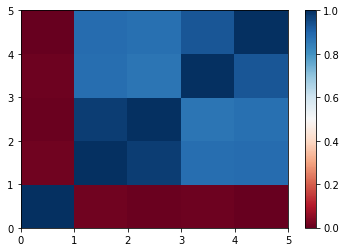

In [25]:
plt.pcolor(eda.corr(), cmap = 'RdBu')
plt.colorbar()
plt.show()

In [26]:
eda[['GSM921516', 'GSM921517']].corr()

,GSM921516,GSM921517
GSM921516,1.000000,0.928779
GSM921517,0.928779,1.000000


(0.0, 15.26876571292736)

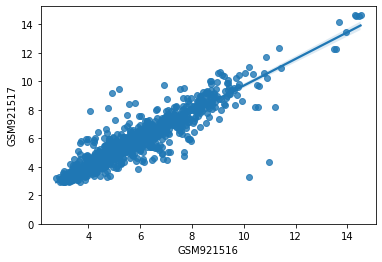

In [27]:
sns.regplot(x='GSM921516', y='GSM921517', data=eda)
plt.ylim(0,)

In [28]:
eda['GSM921516'].corr(data['GSM921517'])

0.9287789124071776